In [115]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

# Описание задачи

Задача заключается в предсказании статуса кредита (*loan_status*), который является целевым признаком (бинарным: дефолт по кредиту или отсутствие дефолта). Основная цель — определить вероятность того, что клиент окажется в состоянии дефолта, на основе предоставленных данных о его личных характеристиках, финансовом положении и параметрах кредита.

---

### Суть задачи:
1. **Тип задачи**: Бинарная классификация.  
   Мы хотим разделить клиентов на две группы:
   - Те, кто, скорее всего, вернут кредит.
   - Те, кто, скорее всего, окажутся в дефолте.


2. **Входные данные (факторы):**
   - **Характеристики клиента**: возраст, доход, тип жилья, трудовой стаж.
   - **Кредитная история**: длина кредитной истории, данные о предыдущих дефолтах.
   - **Параметры кредита**: сумма займа, процентная ставка, рейтинг кредита, цель займа.
   - **Финансовая нагрузка**: отношение кредита к доходу.

3. **Целевой признак**:  
   - *`loan_status`* — бинарный признак:
     - `0`: кредит выплачен (отсутствие дефолта).
     - `1`: кредит не выплачен (дефолт).

4. **Результат**:  
   Построить модель, которая сможет с высокой точностью предсказать, окажется ли клиент в состоянии дефолта, опираясь на входные данные.



# Загрузка данных

In [120]:
credit_data = pd.read_csv("credit_risk_dataset.csv")
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [122]:
credit_data.shape

(32581, 12)

# Описание признаков 

In [125]:
credit_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [127]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Описание признаков датасета:

1. **`person_age`** (int64)  
   Возраст человека.

2. **`person_income`** (int64)  
   Доход человека.

3. **`person_home_ownership`** (object)  
   Тип владения жильем. 

4. **`person_emp_length`** (float64)  
   Длительность трудового стажа человека (в годах).  

5. **`loan_intent`** (object)  
   Цель кредита. 

6. **`loan_grade`** (object)  
   Рейтинг кредита.

7. **`loan_amnt`** (int64)  
   Сумма займа.

8. **`loan_int_rate`** (float64)  
   Процентная ставка по кредиту. 

9. **`loan_status`** (int64)  
   Статус кредита. (_таргетное значение_) 

10. **`loan_percent_income`** (float64)  
    Процент дохода, который человек тратит на кредит.

11. **`cb_person_default_on_file`** (object)  
    История дефолта человека в кредитном бюро. 

12. **`cb_person_cred_hist_length`** (int64)  
    Длительность кредитной истории человека (в годах). 



# Обработаем пропущенные значения 


In [131]:
credit_data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<Axes: xlabel='loan_int_rate', ylabel='Count'>

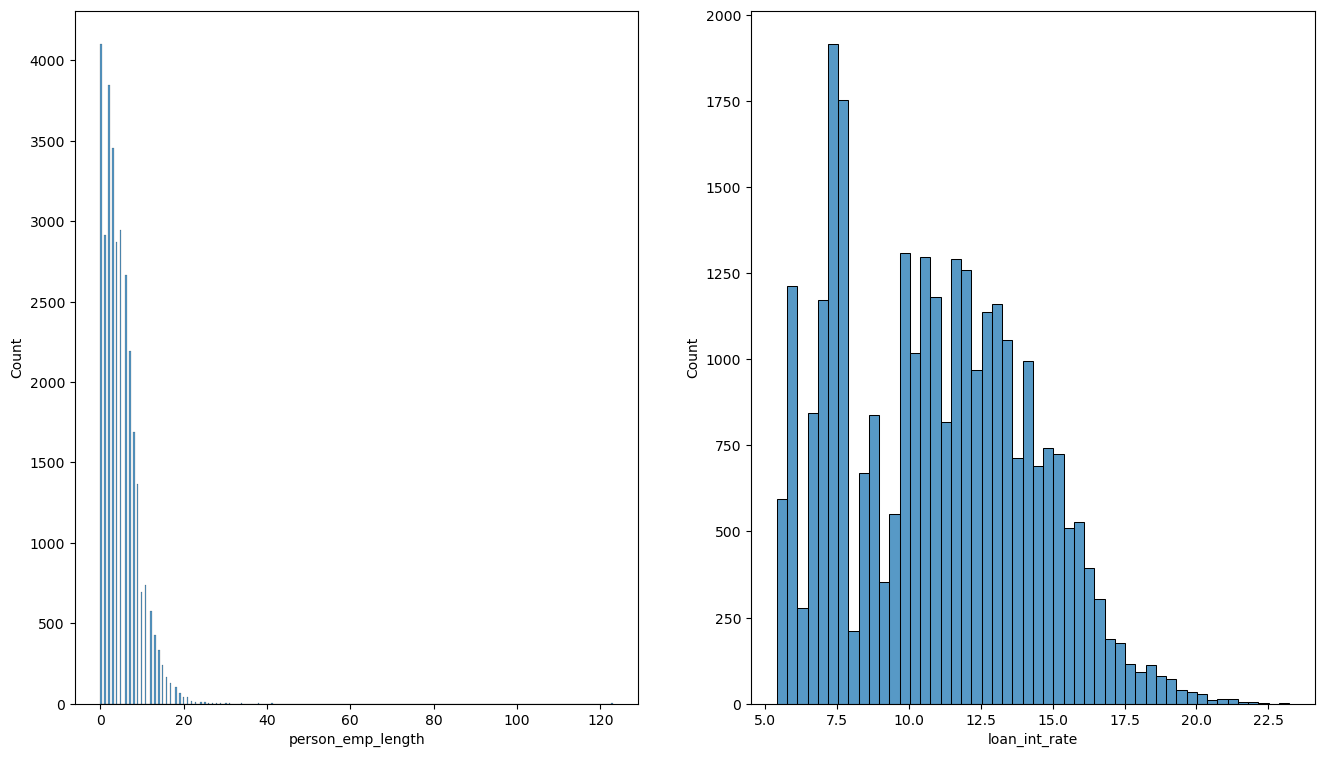

In [133]:
#Посмотрим на распределения признаков с выбросами 
fig = plt.figure()
fig.set_size_inches(16,9)

ax_1 = fig.add_subplot(1,2,1)
sns.histplot(credit_data["person_emp_length"])

ax_2 = fig.add_subplot(1,2,2)
sns.histplot(credit_data["loan_int_rate"])

In [134]:
#На основе полученных распределений заполняем пропуски медианой
credit_data["person_emp_length"] = credit_data["person_emp_length"].fillna(credit_data["person_emp_length"].median())
credit_data["loan_int_rate"] = credit_data["loan_int_rate"].fillna(credit_data["loan_int_rate"].median())

In [135]:
credit_data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Визуализация данных

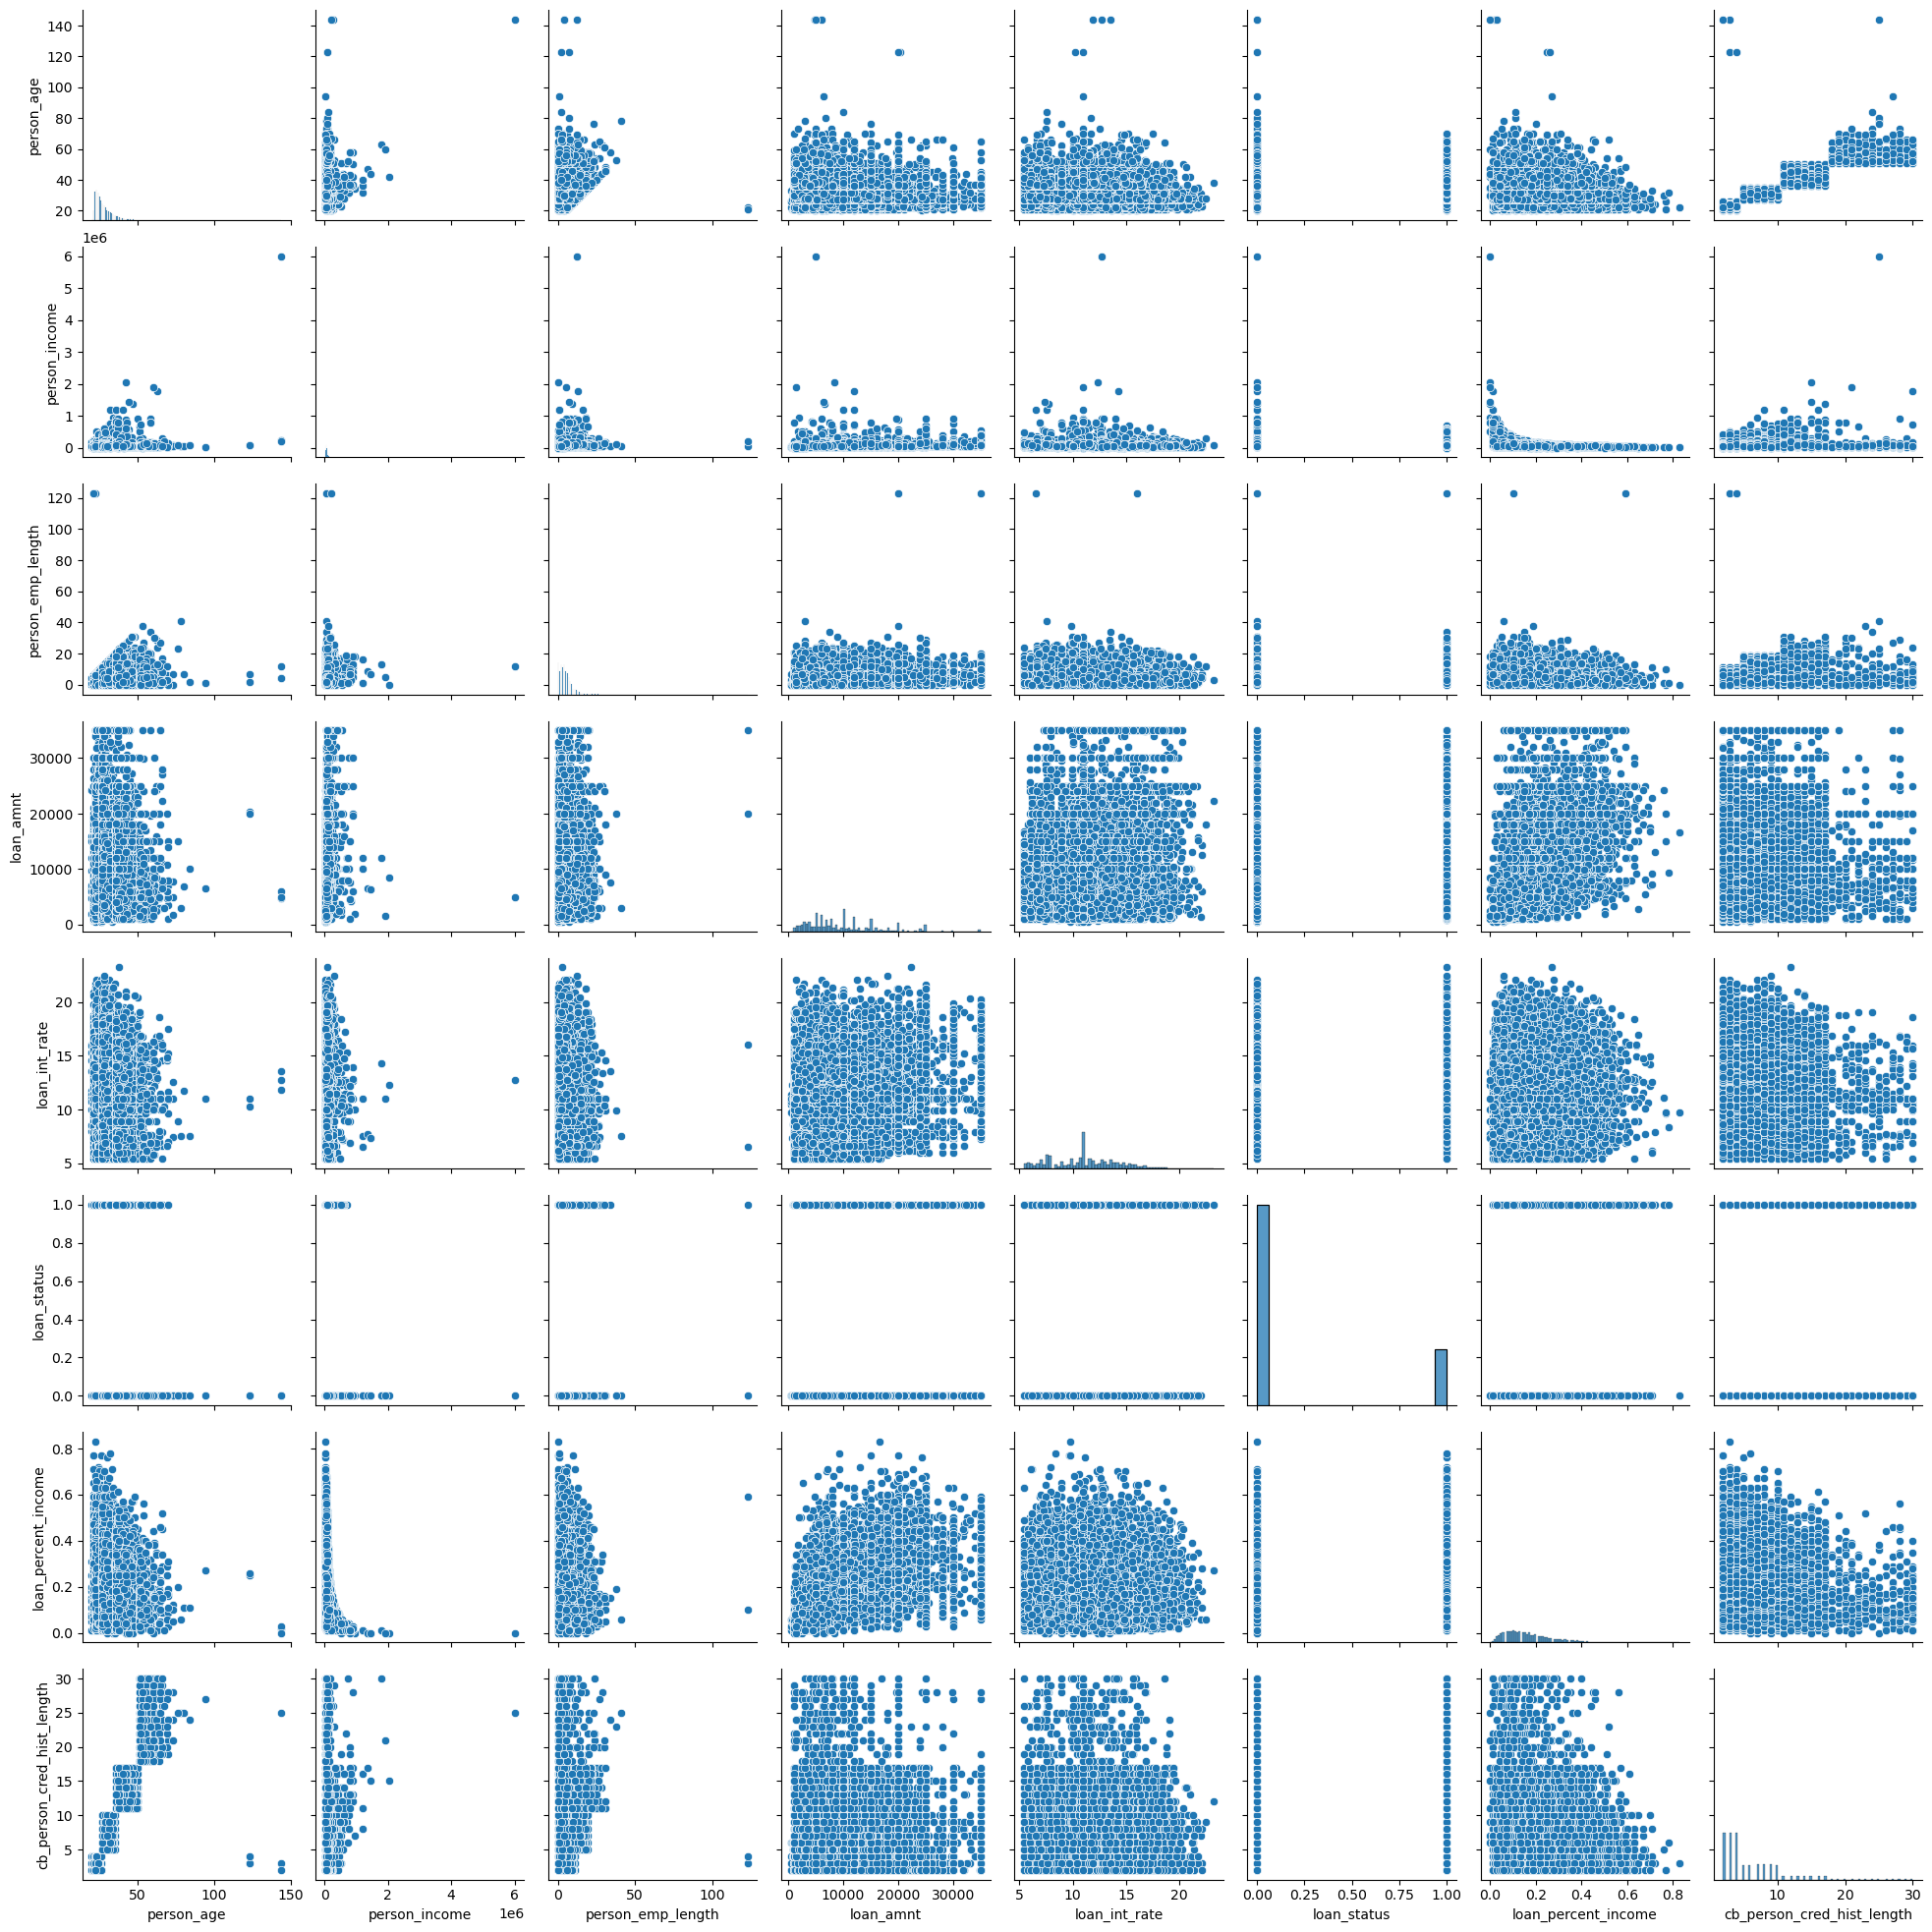

In [137]:
sns.pairplot(credit_data, diag_kind="hist")


In [138]:
corr_mat = credit_data.corr(numeric_only=True)
corr_mat

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.161454,0.050787,0.011853,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.135164,0.266820,0.000746,-0.144449,-0.254471,0.117987
person_emp_length,0.161454,0.135164,1.000000,0.113851,-0.051262,-0.082182,-0.054134,0.143069
loan_amnt,0.050787,0.266820,0.113851,1.000000,0.139483,0.105376,0.572612,0.041967
loan_int_rate,0.011853,0.000746,-0.051262,0.139483,1.000000,0.319360,0.114514,0.015762
loan_status,-0.021629,-0.144449,-0.082182,0.105376,0.319360,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054134,0.572612,0.114514,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.143069,0.041967,0.015762,-0.015529,-0.031690,1.000000


<Axes: >

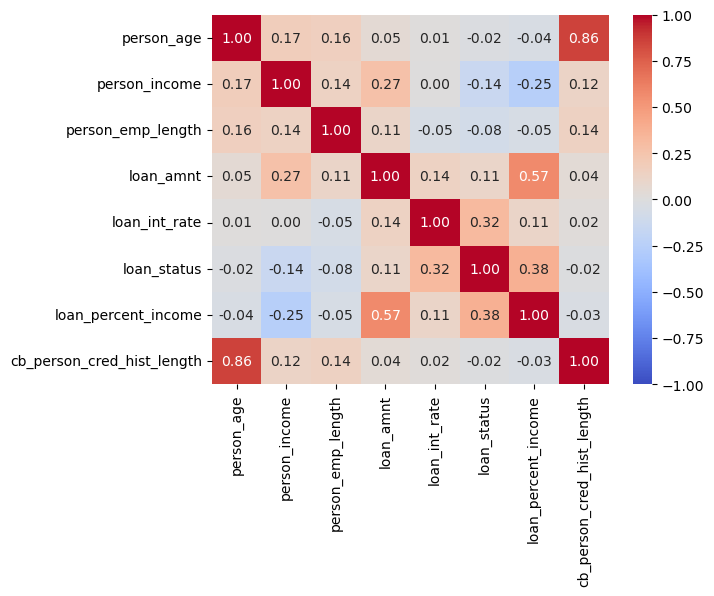

In [142]:
sns.heatmap(corr_mat,
            annot=True,
            fmt=".2f", 
            vmin=-1, 
            vmax=1,
            cmap="coolwarm")

<Axes: xlabel='loan_percent_income', ylabel='Count'>

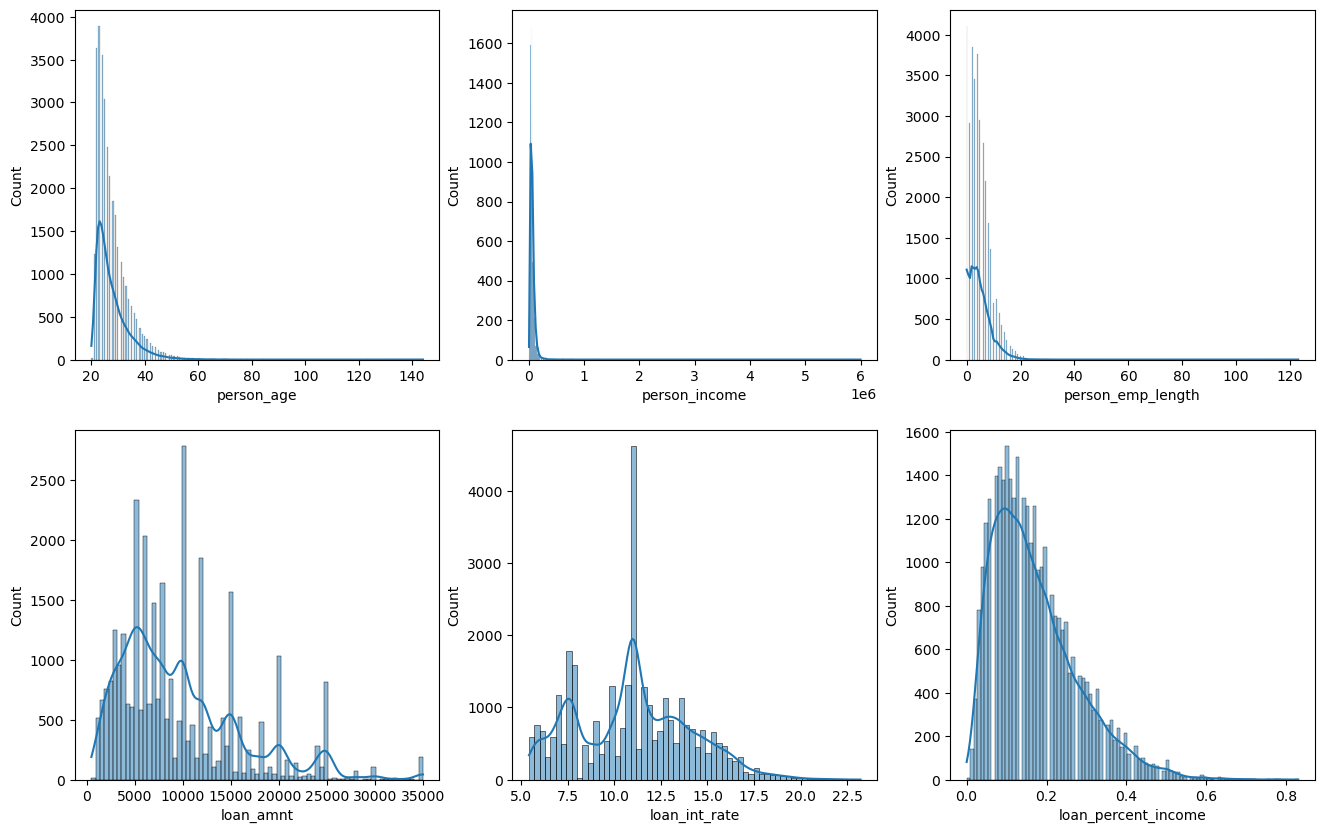

In [143]:
fig = plt.figure()
fig.set_size_inches(16,10)


ax_1 = fig.add_subplot(2,3,1)
sns.histplot(credit_data["person_age"], kde=True)

ax_2 = fig.add_subplot(2,3,2)
sns.histplot(credit_data["person_income"], kde=True)

ax_3 = fig.add_subplot(2,3,3)
sns.histplot(credit_data["person_emp_length"], kde=True)

ax_4 = fig.add_subplot(2,3,4)
sns.histplot(credit_data["loan_amnt"], kde=True)

ax_5 = fig.add_subplot(2,3,5)
sns.histplot(credit_data["loan_int_rate"], kde=True)

ax_6 = fig.add_subplot(2,3,6)
sns.histplot(credit_data["loan_percent_income"], kde=True)

# Борьба с выбросами и мультиколлинеарностью

In [145]:
credit_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [146]:
#заметили сильную корреляцию признаков cb_person_cred_hist_length и person_age.  
#Удалим один из них чтобы избежать проблемы переобучения модели в связи с мультиколлинеарностью
credit_data = credit_data.drop("cb_person_cred_hist_length", axis=1)

#### Замечаем выбросы: 
**person_age**: возраст человека 144-года - многовато

**person_income**: распределение выглядит в пределах нормы. В основном люди не богатые, минимальный доход 4000, в среднем люди получают около 5500, а есть малая часть ботатых людей чей доход считается в миллионах

**person_emp_length**:  стаж работы 123-года - многовато

**loan_amnt**: суммы займов выглядят интуитивно понятно. Есть как совсем маленькие займы в 500, так и большие в 35000, но их мало, что логично. Обычно люди берут среднюю сумму кредита около 10000. 

**loan_amnt**: процентные ставки стандартные. 

**loan_percent_income** странно брать кредит и отдавать 0% от своего дохода

In [148]:
quantity_start_data = credit_data.shape[0]

deleter_person_emp = credit_data["person_emp_length"].quantile(0.995)
deleter_loan_perc_lower = credit_data["loan_percent_income"].quantile(0.005)
deleter_loan_perc_upper = credit_data["loan_percent_income"].quantile(0.9975)

#уберем 0.5% данных, чтобы избежать выбросов стажа работы
credit_data = credit_data[credit_data["person_emp_length"]<deleter_person_emp]
#уберем 1.5% данных, чтобы избежать выбросов по проценту дохода, тратящамуся на кредит
credit_data = credit_data[(credit_data["loan_percent_income"]>deleter_loan_perc_lower) & 
                                                 (credit_data["loan_percent_income"]<deleter_loan_perc_upper)]
#ограничем возраст человека до 100 лет
credit_data = credit_data[credit_data["person_age"]<100] 

print(f"Доля сохранненых данных после фильтрации: {round(credit_data.shape[0]/quantity_start_data, 3)}")
print(f"Строк удалено: {round(quantity_start_data-credit_data.shape[0], 3)}")

Доля сохранненых данных после фильтрации: 0.975
Строк удалено: 818


# Обработаем категориальные признаки 


In [150]:
credit_data.loc[:, credit_data.dtypes=="object"].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [151]:
import pandas as pd
import numpy as np

# Определяем категориальные и числовые признаки
cat_cols = credit_data.loc[:, credit_data.dtypes == "object"].columns
num_cols = credit_data.loc[:, credit_data.dtypes != "object"].columns

for col in cat_cols:
    if credit_data[col].nunique() < 5:
        # One-Hot Encoding для категорий с небольшим количеством уникальных значений
        one_hot = pd.get_dummies(credit_data[col], prefix=col, drop_first=True)
        credit_data = pd.concat((credit_data.drop(col, axis=1), one_hot), axis=1)
    else:
        # Mean Target Encoding с добавлением шума
        target_mean = credit_data.groupby(col)['loan_status'].mean()
        target_std = credit_data.groupby(col)['loan_status'].std()
        
        # Задаём шум 
        noise_scale = 0.01
        credit_data[col] = credit_data[col].map(lambda x: 
            target_mean[x] + np.random.normal(0, noise_scale * target_std[x] if not pd.isna(target_std[x]) else 0)
        )


In [152]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31763 entries, 1 to 32580
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   31763 non-null  int64  
 1   person_income                31763 non-null  int64  
 2   person_emp_length            31763 non-null  float64
 3   loan_intent                  31763 non-null  float64
 4   loan_grade                   31763 non-null  float64
 5   loan_amnt                    31763 non-null  int64  
 6   loan_int_rate                31763 non-null  float64
 7   loan_status                  31763 non-null  int64  
 8   loan_percent_income          31763 non-null  float64
 9   person_home_ownership_OTHER  31763 non-null  bool   
 10  person_home_ownership_OWN    31763 non-null  bool   
 11  person_home_ownership_RENT   31763 non-null  bool   
 12  cb_person_default_on_file_Y  31763 non-null  bool   
dtypes: bool(4), float64(5

# Разобъем на обучающую и тестовую выборку 

In [154]:
from sklearn.model_selection import train_test_split 

X = credit_data.drop("loan_status", axis=1)
y = credit_data["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=1)

# Обучение модели 
В качестве метрики мы возьмем f1-меру, так как наши классы не сбалансированы (нельзя использовать **accuracy**) и мы хотим учитывать в нашей задаче как **recall(полноту)**, так и **precision(точность)**.   

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

#### Логистическая регрессия 
Мы обучим логистическую регрессию, перебирая значения гиперпараметра **альфа** и различные виды регуляризации: **L1**, **L2**


$$
L1 = \lambda \sum_{i=1}^n |w_i|
$$

$$
L2 = \lambda \sum_{i=1}^n w_i^2
$$

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Для того, чтобы использовать регуляризацию необходимо провести масштабирование
pipe_log_reg = Pipeline([("scalar", StandardScaler()),
                       ("LR", LogisticRegression(solver="saga", max_iter=1000))])

pipe_log_reg.get_params() #рассмотрим какие параметры мы можем изменять

{'memory': None,
 'steps': [('scalar', StandardScaler()),
  ('LR', LogisticRegression(max_iter=1000, solver='saga'))],
 'verbose': False,
 'scalar': StandardScaler(),
 'LR': LogisticRegression(max_iter=1000, solver='saga'),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'LR__C': 1.0,
 'LR__class_weight': None,
 'LR__dual': False,
 'LR__fit_intercept': True,
 'LR__intercept_scaling': 1,
 'LR__l1_ratio': None,
 'LR__max_iter': 1000,
 'LR__multi_class': 'auto',
 'LR__n_jobs': None,
 'LR__penalty': 'l2',
 'LR__random_state': None,
 'LR__solver': 'saga',
 'LR__tol': 0.0001,
 'LR__verbose': 0,
 'LR__warm_start': False}

In [161]:
alphas = np.linspace(0.01, 100, 100) #сгенерируем массив значений гиперпараметра альфа, который будем перебирать. 

In [162]:
from sklearn.model_selection import GridSearchCV

param_grid = {"LR__C": alphas,
              "LR__penalty": [None, "l1", "l2"]}


search = GridSearchCV(pipe_log_reg, param_grid, cv=5, scoring='f1')

search.fit(X_train, y_train)

C:\Users\79965\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\79965\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\79965\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\79965\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\79965\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\79965\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None wil

Best parameter (CV score=0.64625):
{'LR__C': 1.02, 'LR__penalty': 'l1'}


In [163]:
print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.64625):
{'LR__C': 1.02, 'LR__penalty': 'l1'}


In [197]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver="saga", 
                           max_iter=1000, 
                           penalty="l2", 
                           C=1.02)

model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.02, max_iter=1000, solver='saga')

In [199]:
from sklearn.metrics import f1_score

train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

f1_train = f1_score(train_predictions, y_train)
f1_test = f1_score(test_predictions, y_test)

print(f"f1_score на train: {f1_train:.2f}")
print(f"f1_score на test: {f1_test:.2f}")

f1_score на train: 0.65
f1_score на test: 0.64


### Метод K ближайших соседей. 
Будем использовать Евклидово расстояние и Гауссовское ядро.
Перем разные значения k.


Ширина Гауссовского ядра

$$
w_i = \frac{1}{\sqrt{2\cdot\pi}} \cdot exp(-\frac{1}{2}\cdot \frac{\rho^2 (x, x_i)}{h^2})
$$

In [169]:
def kernel(distances, h=500):
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
        return const * np.exp(power)

In [170]:
from sklearn.neighbors import KNeighborsClassifier

all_k = np.arange(1, 50)

models = []
f1_score_train_history = []
f1_score_test_history = []
for neighbords in all_k:
    model = KNeighborsClassifier(n_neighbors=neighbords, weights=kernel)
    model.fit(X_train_with_labels, y_train)
    models.append(model)
    print("////////////////////////////////////////////////////////")
    f1_score_train = f1_score(model.predict(X_train_with_labels), y_train)
    f1_score_test = f1_score(model.predict(X_test_with_labels), y_test)
    
    f1_score_train_history.append(f1_score_train)
    f1_score_test_history.append(f1_score_test)
    
    print(f"Модель с {neighbords} соседями")
    print(f"f1_score на train = {f1_score_train}")
    print(f"f1_score на test = {f1_score_test}")
    
    print("////////////////////////////////////////////////////////")



////////////////////////////////////////////////////////
Модель с 1 соседями
f1_score на train = 1.0
f1_score на test = 0.6572090330052114
////////////////////////////////////////////////////////
////////////////////////////////////////////////////////
Модель с 2 соседями
f1_score на train = 1.0
f1_score на test = 0.6572090330052114
////////////////////////////////////////////////////////
////////////////////////////////////////////////////////
Модель с 3 соседями
f1_score на train = 0.8192923336141533
f1_score на test = 0.7047318611987382
////////////////////////////////////////////////////////
////////////////////////////////////////////////////////
Модель с 4 соседями
f1_score на train = 0.8662662029718622
f1_score на test = 0.7095343680709534
////////////////////////////////////////////////////////
////////////////////////////////////////////////////////
Модель с 5 соседями
f1_score на train = 0.7799016930638996
f1_score на test = 0.7184846505551928
////////////////////////////////

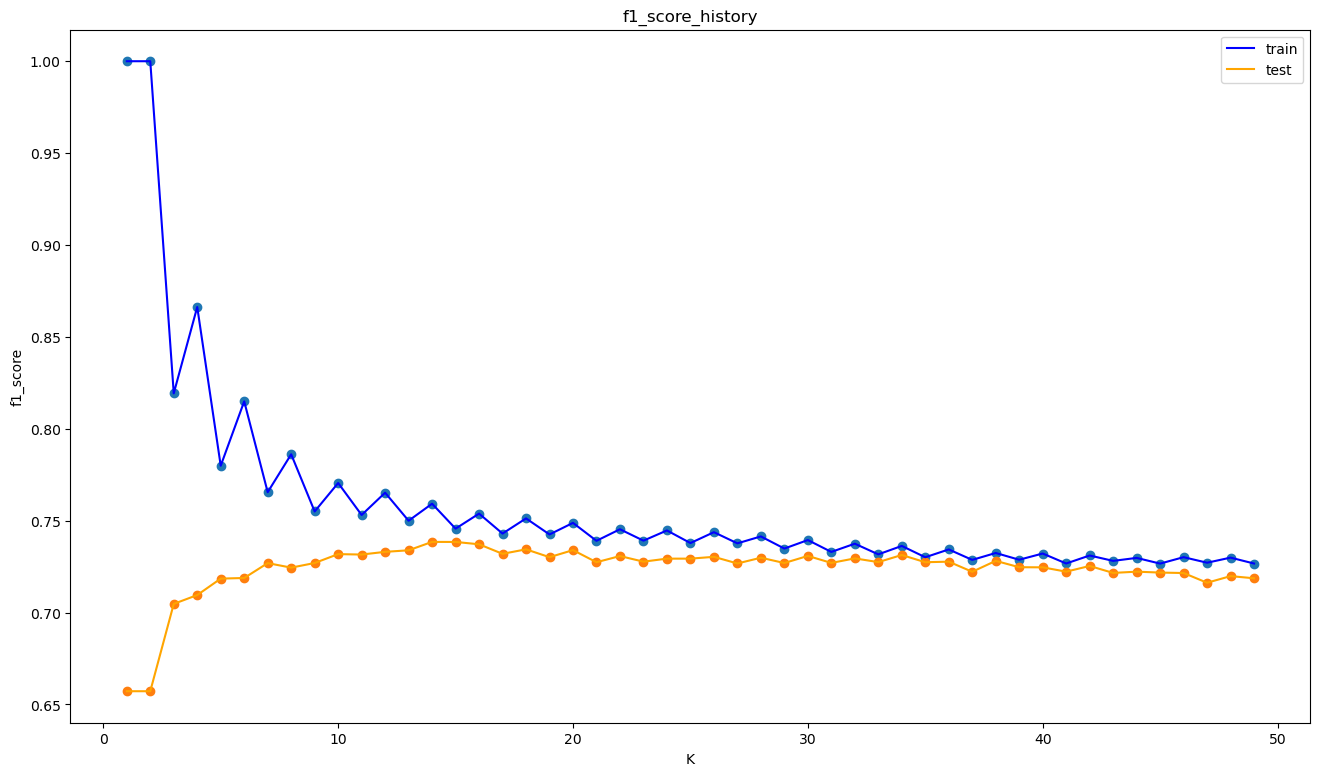

In [171]:
fig = plt.figure()
fig.set_size_inches(16, 9)

plt.plot(all_k, f1_score_train_history, label="train", color="blue")
plt.plot(all_k, f1_score_test_history, label="test", color="orange")
plt.scatter(all_k, f1_score_train_history)
plt.scatter(all_k, f1_score_test_history)

plt.xlabel("K")
plt.ylabel("f1_score")
plt.title("f1_score_history")
plt.legend()

In [172]:
max_index = f1_score_test_history.index(max(f1_score_test_history))

print(f"Лучшая модель: {models[max_index]}")
print(f"f1_score на train: {f1_score_train_history[max_index]:.2f}")
print(f"f1_score на test: {f1_score_test_history[max_index]:.2f}")

Лучшая модель: KNeighborsClassifier(n_neighbors=14,
                     weights=<function kernel at 0x00000281EF7D6A20>)
f1_score на train: 0.76
f1_score на test: 0.74


# Выводы

### 1. **Логистическая регрессия: F1 = 0.64**
   - Логистическая регрессия — линейная модель, которая хорошо работает, если классы разделимы линейно.
   - Значение F1 = 0.64 свидетельствует о том, что модель предсказывает с приемлемой точностью, но явно не использует всю доступную информацию из данных. Это может указывать на:
     - Сложную (нелинейную) структуру данных, которую линейная модель не может уловить.

---

### 2. **k-NN: F1 = 0.74**
   - Метод k ближайших соседей показал заметно лучший результат. Это говорит о том, что данные имеют локальную структуру или кластеризацию, которые k-NN способен учитывать.
   - Преимущество k-NN объясняется его способностью справляться с нелинейными зависимостями и учитывать локальные отношения между объектами.

---

### 3. **Сравнение моделей**
   - Разница в F1-метрике (0.74 - 0.64 = 0.10) показывает, что метод k-NN лучше справляется с текущими данными.
   - Логистическая регрессия могла быть ограничена своей линейной природой.

---

### Итог:
Результаты показывают, что **метод k ближайших соседей (k-NN)**  лучше подходит для текущей задачи, так как он способен улавливать сложные зависимости в данных.